#Perform Exploratory Data Analysis , Data Cleaning & Feature Engg on the Training dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy.random import seed
from numpy.random import randn
from numpy import percentile


df_model=pd.read_csv("/content/dataset_model.csv")
print(df_model)

      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]


In [0]:
df_model.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
df_model.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df_model.shape

(614, 13)

In [0]:
print(len(df_model))

614


In [0]:
print(df_model.index)

RangeIndex(start=0, stop=614, step=1)


In [0]:
print(df_model.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe

In [0]:
for i in df_model:
  print(i)
  print(df_model[i].is_unique)


Loan_ID
True
Gender
False
Married
False
Dependents
False
Education
False
Self_Employed
False
ApplicantIncome
False
CoapplicantIncome
False
LoanAmount
False
Loan_Amount_Term
False
Credit_History
False
Property_Area
False
Loan_Status
False


#Hence from above we conclude that only Loan_ID is unique column. 

In [0]:
# appending unique column in new dataframe
uni_df=[]
uni_df.append(df_model['Loan_ID'])
print(uni_df)
#In this we are storing unique column Loan_ID in new dataframe

[0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object]


In [0]:
df_model=df_model.drop("Loan_ID",axis=1)

In [0]:
df_model.head(5)
#In the table shown below we have seen that unique column name Loan_ID get removed

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Identifying Continous & Categorical Columns

In [0]:
#for continuous columns
num_cols = df_model._get_numeric_data().columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [0]:
#Continuous
for i in num_cols:
  print(str(i)+'\t'+str(len(df_model[i].unique())))

ApplicantIncome	505
CoapplicantIncome	287
LoanAmount	204
Loan_Amount_Term	11
Credit_History	3


#categorial columns

In [0]:

for j in list(set(df_model.columns) - set(num_cols)):
  print(str(j)+'\t'+str(len(df_model[j].unique())))

Loan_Status	2
Dependents	5
Self_Employed	3
Gender	3
Property_Area	3
Married	3
Education	2


In [0]:
df_model['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [0]:
df_model['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [0]:
df_model['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [0]:
df_model['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [0]:
df_model['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [0]:
df_model['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [0]:
df_model['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

Performing Uni-variate Analysis with Plots.Record your Observations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc174f43160>,
      dtype=object)

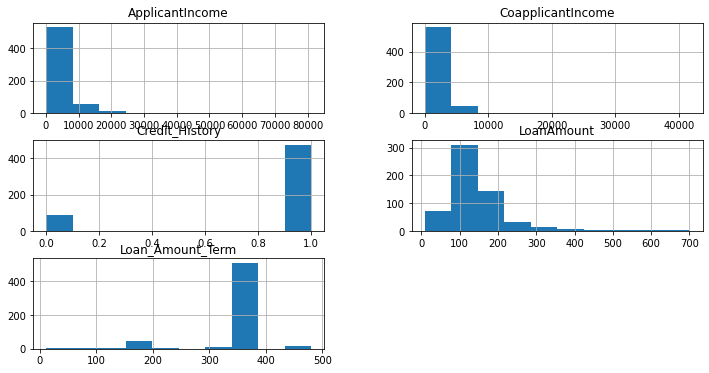

In [0]:
#Takes all numerical data (continous or categorical) and plots
df_model.hist(figsize=[12,6])

observation

1.)The Applicant income lies between 0-10000 is highest so these applicants have higher chance of getting a lone

2.)Highest loan amount received by applicants is lies between 90-150 and and after that the loan amount is decreases

3.)Credit_History of applicants is maximum from 0.7-1.0

4.)Term To pay the loan amount is maximum from approx(310-390)

categorial univariate analysis

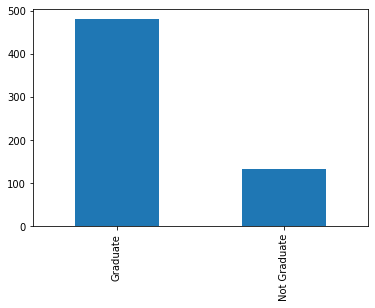

In [0]:
df_model['Education'].value_counts().plot.bar()

observation
1.) Graduates have Higher education Than Not Graduate

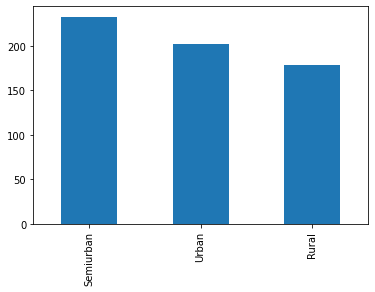

In [0]:
df_model['Property_Area'].value_counts().plot.bar()

obsrvation

1.)Property_Area is maximum for Semiurban then it decreases for urban rural

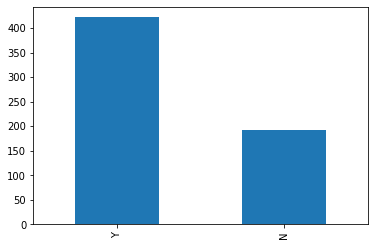

In [0]:
df_model['Loan_Status'].value_counts().plot.bar()

1.) Chances of Getting a loan by Applicants is higher thats why it is yes than no

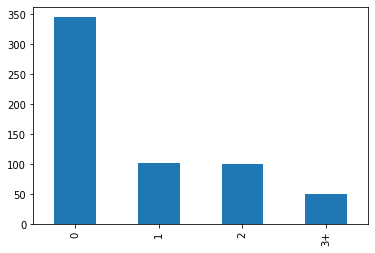

In [0]:
df_model['Dependents'].value_counts().plot.bar()

observation
Dependents 0 have highest bar

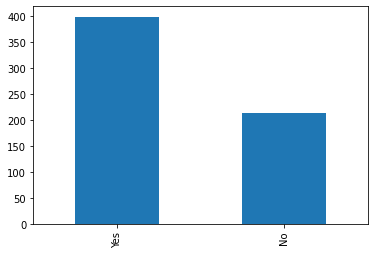

In [0]:
df_model['Married'].value_counts().plot.bar()

observation 
chances of getting a loan are higher for married

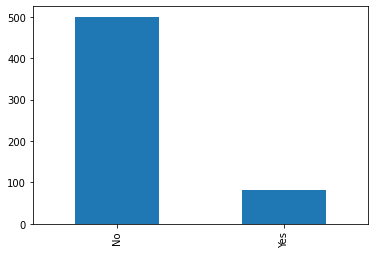

In [0]:
df_model['Self_Employed'].value_counts().plot.bar()

Self_Employed have less chances of getting loan.

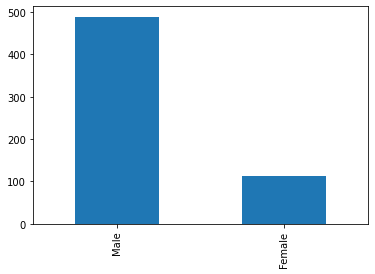

In [0]:
df_model['Gender'].value_counts().plot.bar()

In [0]:
Observation 
Gender male have more chances of getting a loan than female

Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations



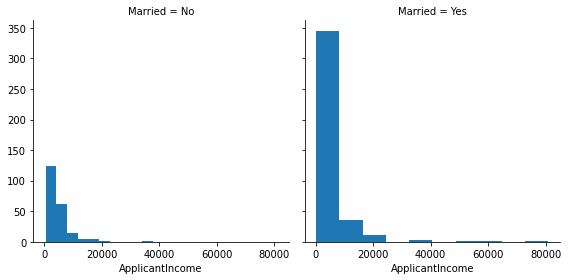

In [0]:
fn=sns.FacetGrid(df_model,col='Married',height=4,aspect=1)
fn=fn.map(plt.hist,"ApplicantIncome")

Observations

1)Applicant Income is more in case when they are married but less in case when they are not married

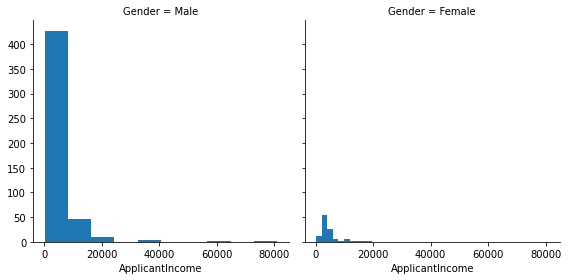

In [0]:
fn=sns.FacetGrid(df_model,col='Gender',height=4,aspect=1)
fn=fn.map(plt.hist,"ApplicantIncome")

Observation

Applicant is more in case when the gender is male while it is less in case when the gender is female.

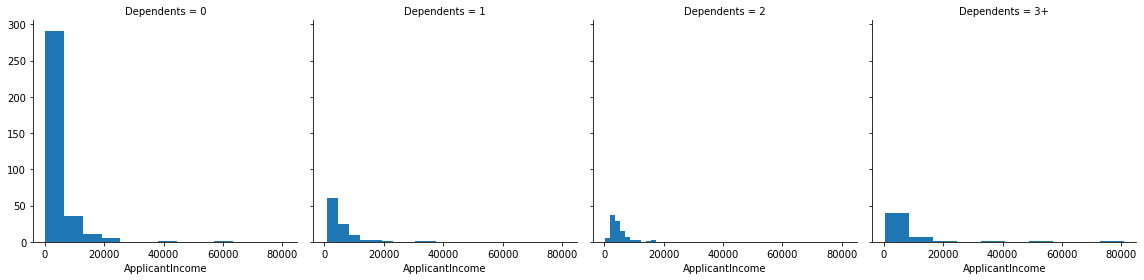

In [0]:
fn=sns.FacetGrid(df_model,col='Dependents',height=4,aspect=1)
fn=fn.map(plt.hist,"ApplicantIncome")

Observation

1.)ApplicantIncome is maximum or highest when the dependent is 0

2.)ApplicantIncome is approximately same for dependent 2 and 3+

3.)ApplicantIncome  is slightly more than when Depentdents are 2 and 3+

4) One more Thing that i am observing in every plot for dependents V ApplicantIncome that  applicants income is decreases after 20000 as we move along x-axis i,e it is slightly greater than 0 along y-axis for Dependent 0 at points 40000 and 60000 and it is greater than 0 along y-axis for Dependent 1 in ApplicantIncome between 250000- 30000
while it is zero for Dependent 3 but it is slightly greater than 0 for Dependent 0 along y-axis.

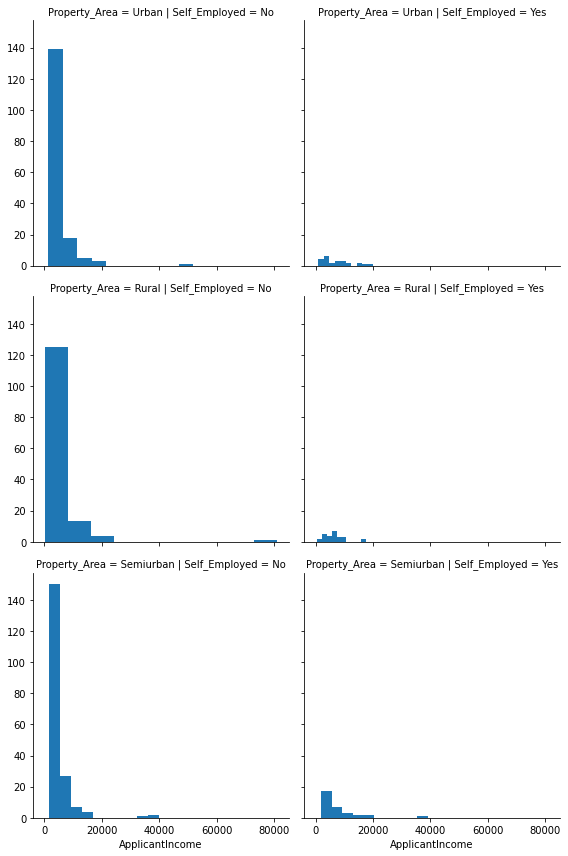

In [0]:
fn=sns.FacetGrid(df_model,col='Self_Employed',row='Property_Area',height=4,aspect=1)
fn=fn.map(plt.hist,"ApplicantIncome")

In [0]:
#Observations

#1.)ApplicantIncome  is More for Self_Employed=No Than for Self_Employed=Yes
#2.)ApplicantIncome is Highest when Property_Area is Semiurban and Self_Employed=No height of bar is greater than 140 along y-axis 
#3.)ApplicantIncome is more when Property_Area=Semiurban And Self_Employed=Yes as compared to other  Self_Employed=Yes and Property_Area combinations 

Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc

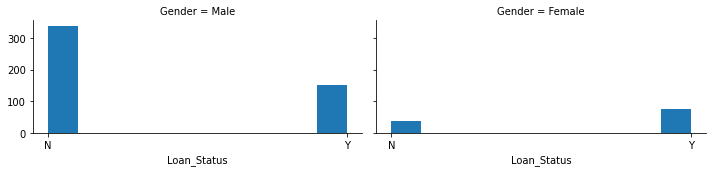

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fn =sns.FacetGrid(df_model,col='Gender',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
fn = fn.map(plt.hist,"Loan_Status")

observation

1.)There are higher chances of getting loan for male than female

2.)But No for female are less than for male

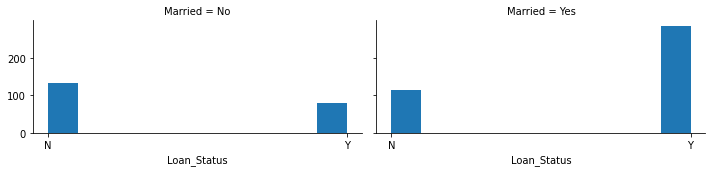

In [0]:
fn =sns.FacetGrid(df_model,col='Married',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
fn = fn.map(plt.hist,"Loan_Status")

observation

1.)Married have higher chances of getting loan .

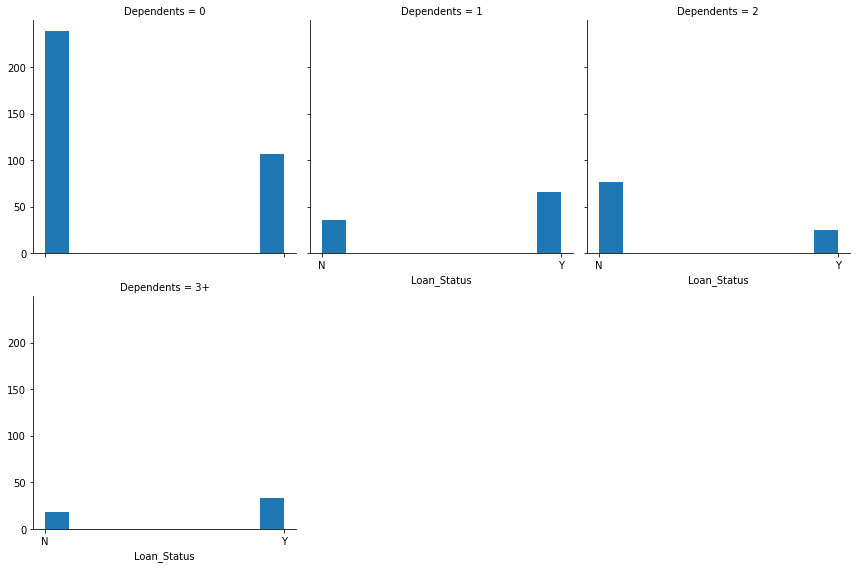

In [0]:
fn = sns.FacetGrid(df_model,col='Dependents',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Loan_Status")


observationn

1. Dependents 0 have higher chances of getting a loan while Dependent 3+ have lowest.

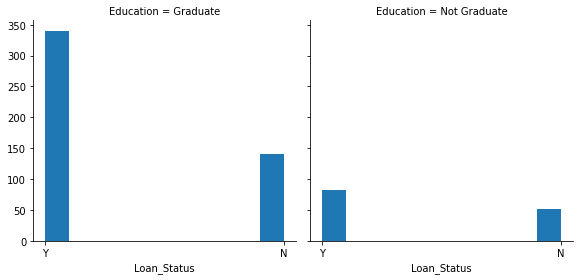

In [0]:
fn = sns.FacetGrid(df_model,col='Education',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Loan_Status")


obseravtion
Graduate have higher chances of getting loan than Not Graduate. 

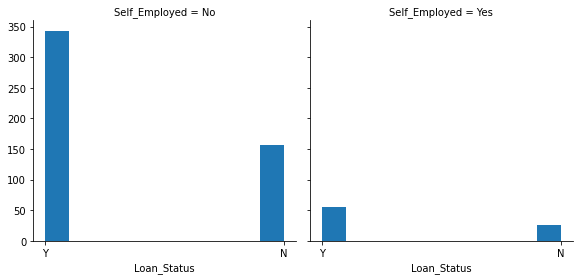

In [0]:
fn = sns.FacetGrid(df_model,col='Self_Employed',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Loan_Status")


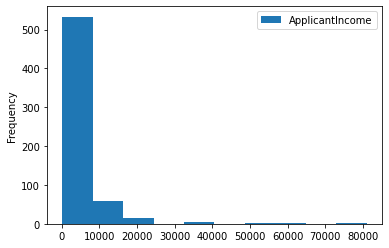

In [0]:
df_model.plot.hist(x='Loan_Status', y='ApplicantIncome')

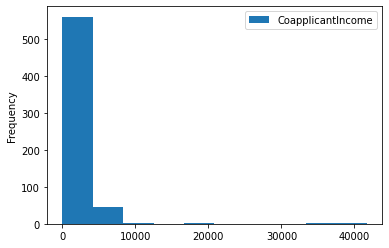

In [0]:
df_model.plot.hist(x='Loan_Status', y='CoapplicantIncome')

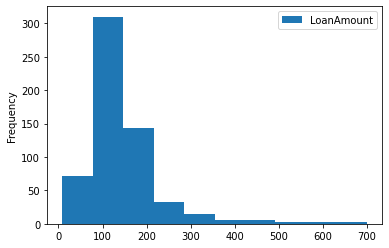

In [0]:
df_model.plot.hist(x='Loan_Status', y='LoanAmount')

LoanAmount is highest for Loan_status 100-150 

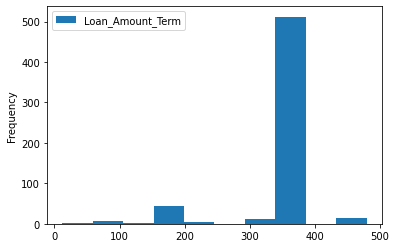

In [0]:
df_model.plot.hist(x='Loan_Status', y='Loan_Amount_Term')

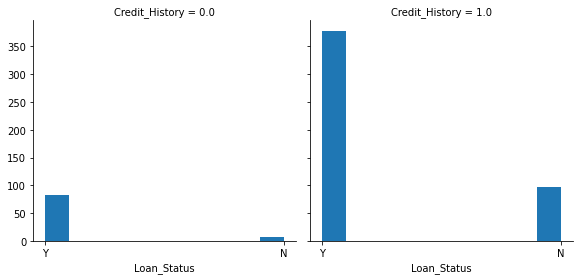

In [0]:
fn = sns.FacetGrid(df_model,col='Credit_History',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Loan_Status")


observation
credit_History=1 have highest chances of getting loan

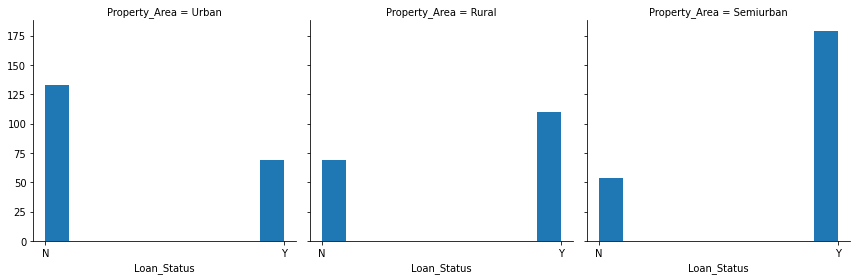

In [0]:
fn = sns.FacetGrid(df_model,col='Property_Area',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Loan_Status")


observation
Proprty_Area= Semiurban have Highest area and also have highest Loan_status.
While it is approx same for Propert_Area =Urban  and Rural.

How is the class distribution (Y/N) in Label(Target) Variable ?

In [0]:
# it is a binary class distribution
df_model.groupby(['Loan_Status']).size()

Loan_Status
N    192
Y    422
dtype: int64

Identify the Independent Variables that have missing values.

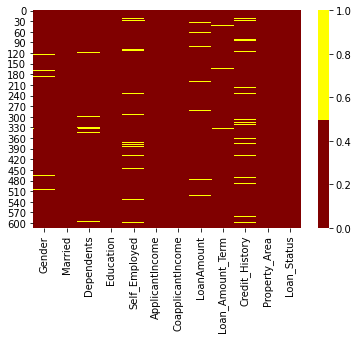

In [0]:
#missing data heatmap
colun=df_model.columns[:12]#take 12 columns
colours=['#800000','#ffff00']
#specify the colours-yellow is missing value ,maroon is not missing
sns.heatmap(df_model[colun].isnull(),cmap=sns.color_palette(colours))

Handle missing values appropriately , explain the technique applied for each case

In [0]:
df_model.isna()  #This function is used to detect missing valus. If the values are NA ,NA values get mapped to True Values.Everything get mapped to False values

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
df_model.isna().any() # return a boolean value for each column .If There is atleast one missing value in that column,the result is True

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [0]:
df_model.isna().sum() #returns the number of missing values in each column

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
#There are many of methods of handling missing values
#some of the are
#Drop the observation 
#Drop rows with a lot of missing values
m_missing=df_model[df_model['Credit_History']>40].index
df_less_missing_rows=df_model.drop(m_missing,axis=0)
print(df_model.shape)
print(df_less_missing_rows.shape)

(614, 12)
(614, 12)


In [0]:
#drop the feature 
#In This we are replacing the feature self_employed with tolal sum of missing values is 32
col_to_drop=['Self_Employed']
df_less_self_employese=df_model.drop(col_to_drop,axis=1)
print(df_model.shape)
print(df_less_self_employese.shape)

(614, 12)
(614, 11)


In [0]:
df_model['LoanAmount']=df_model['LoanAmount'].fillna(df_model['LoanAmount'].mean())
df_model['Loan_Amount_Term']=df_model['Loan_Amount_Term'].fillna(df_model['Loan_Amount_Term'].mean())
df_model['Credit_History']=df_model['Credit_History'].fillna(df_model['Credit_History'].mean())
df_model['Self_Employed']=df_model['Self_Employed'].fillna(method='ffill')
df_model['Dependents']=df_model['Dependents'].fillna(method='ffill')
df_model['Married']=df_model['Married'].fillna(method='ffill')
df_model['Gender']=df_model['Gender'].fillna(method='ffill')

In [0]:
#replacing missing values
df_model.fillna(0)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [0]:
#Replacing missing values with mean
mean=df_model['LoanAmount'].mean()
df_model['LoanAmount'].fillna(mean)

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)

In [0]:
df_model.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
#identify outliers with interquartile range
import numpy as np
import pandas as pd


# seed the random number generator
seed(1)
# generate univariate observations
df_model = 5 * randn(10000) + 50
# calculate interquartile range
q0, q25 = percentile(df_model, 0), percentile(df_model, 25)
iqr = q25 - q0
print('Percentiles: 00th=%.3f, 25th=%.3f, IQR=%.3f' % (q0, q25, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q0 - cut_off, q25 + cut_off
# identify outliers
outliers = [x for x in df_model if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df_model if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 00th=31.718, 25th=46.685, IQR=14.968
Identified outliers: 2
Non-outlier observations: 9998


on Running the above code first prints the identified 0th and 25th percentiles and the calculated IQR .The number of outliers identified is printed followed by the number of non-outlier observation

In [0]:
#identify outliers with interquartile range

# seed the random number generator
seed(1)
# generate univariate observations
df_model = 5 * randn(10000) + 50
# calculate interquartile range
q25, q50 = percentile(df_model, 25), percentile(df_model, 50)
iqr = q50 - q25
print('Percentiles: 25th=%.3f, 50th=%.3f, IQR=%.3f' % (q25, q50, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q50 + cut_off
# identify outliers
outliers = [x for x in df_model if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df_model if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 25th=46.685, 50th=50.042, IQR=3.357
Identified outliers: 1999
Non-outlier observations: 8001


In [0]:
#identify outliers with interquartile range

# seed the random number generator
seed(1)
# generate univariate observations
df_model = 5 * randn(10000) + 50
# calculate interquartile range
q50, q75 = percentile(df_model, 25), percentile(df_model, 50)
iqr = q75 - q50
print('Percentiles: 50th=%.3f, 75th=%.3f, IQR=%.3f' % (q50, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q50 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df_model if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df_model if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 50th=46.685, 75th=50.042, IQR=3.357
Identified outliers: 1999
Non-outlier observations: 8001


In [0]:
#identify outliers with interquartile range

# seed the random number generator
seed(1)
# generate univariate observations
df_model = 5 * randn(10000) + 50
# calculate interquartile range
q75, q100 = percentile(df_model, 75), percentile(df_model, 100)
iqr = q50 - q25
print('Percentiles: 75th=%.3f, 100th=%.3f, IQR=%.3f' % (q75, q100, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q75 - cut_off, q100 + cut_off
# identify outliers
outliers = [x for x in df_model if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df_model if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 75th=53.359, 100th=70.134, IQR=0.000
Identified outliers: 7500
Non-outlier observations: 2500


In [0]:
import numpy as np
import pandas as pd

In [101]:
#identifying at which place in data there are outliers in dataset
#The lines of code below calculate and print the interquartile range for each of the variables in a dataset
Q1=df_model.quantile(0)
Q3=df_model.quantile(0.25)
IQR=Q3-Q1
print(IQR)

ApplicantIncome      2727.50
CoapplicantIncome       0.00
LoanAmount             91.25
Loan_Amount_Term      348.00
Credit_History          1.00
dtype: float64


The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [102]:
print((df_model < (Q1 - 1.5 * IQR)) |(df_model > (Q3 + 1.5 * IQR)))

     ApplicantIncome  CoapplicantIncome  ...  Property_Area  Self_Employed
0              False              False  ...          False          False
1              False               True  ...          False          False
2              False              False  ...          False          False
3              False               True  ...          False          False
4              False              False  ...          False          False
..               ...                ...  ...            ...            ...
609            False              False  ...          False          False
610            False              False  ...          False          False
611             True               True  ...          False          False
612             True              False  ...          False          False
613            False              False  ...          False          False

[614 rows x 12 columns]


In [103]:
#identifying at which place in data there are outliers in dataset
#The lines of code below calculate and print the interquartile range for each of the variables in a dataset
Q1=df_model.quantile(0.25)
Q3=df_model.quantile(0.50)
IQR=Q3-Q1
print(IQR)

ApplicantIncome       935.00
CoapplicantIncome    1188.50
LoanAmount             27.75
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [104]:
print((df_model < (Q1 - 1.5 * IQR)) |(df_model > (Q3 + 1.5 * IQR)))

     ApplicantIncome  CoapplicantIncome  ...  Property_Area  Self_Employed
0               True              False  ...          False          False
1              False              False  ...          False          False
2              False              False  ...          False          False
3              False              False  ...          False          False
4               True              False  ...          False          False
..               ...                ...  ...            ...            ...
609            False              False  ...          False          False
610            False              False  ...          False          False
611             True              False  ...          False          False
612             True              False  ...          False          False
613            False              False  ...          False          False

[614 rows x 12 columns]


In [105]:
#identifying at which place in data there are outliers in dataset
#The lines of code below calculate and print the interquartile range for each of the variables in a dataset
Q1=df_model.quantile(0.50)
Q3=df_model.quantile(0.75)
IQR=Q3-Q1
print(IQR)

ApplicantIncome      1982.50
CoapplicantIncome    1108.75
LoanAmount             36.75
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [106]:
print((df_model < (Q1 - 1.5 * IQR)) |(df_model > (Q3 + 1.5 * IQR)))

     ApplicantIncome  CoapplicantIncome  ...  Property_Area  Self_Employed
0              False              False  ...          False          False
1              False              False  ...          False          False
2              False              False  ...          False          False
3              False              False  ...          False          False
4              False              False  ...          False          False
..               ...                ...  ...            ...            ...
609            False              False  ...          False          False
610            False              False  ...          False          False
611            False              False  ...          False          False
612            False              False  ...          False          False
613            False              False  ...          False          False

[614 rows x 12 columns]


In [107]:
#identifying at which place in data there are outliers in dataset
#The lines of code below calculate and print the interquartile range for each of the variables in a dataset
Q1=df_model.quantile(0.75)
Q3=df_model.quantile(0.1)
IQR=Q3-Q1
print(IQR)

ApplicantIncome     -3578.90
CoapplicantIncome   -2297.25
LoanAmount            -92.45
Loan_Amount_Term      -60.00
Credit_History         -1.00
dtype: float64


The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [108]:
print((df_model < (Q1 - 1.5 * IQR)) |(df_model > (Q3 + 1.5 * IQR)))

     ApplicantIncome  CoapplicantIncome  ...  Property_Area  Self_Employed
0               True               True  ...          False          False
1               True               True  ...          False          False
2               True               True  ...          False          False
3               True               True  ...          False          False
4               True               True  ...          False          False
..               ...                ...  ...            ...            ...
609             True               True  ...          False          False
610             True               True  ...          False          False
611             True               True  ...          False          False
612             True               True  ...          False          False
613             True               True  ...          False          False

[614 rows x 12 columns]


Use Box-Plot chart to represent the Outliers for each Independent Variable



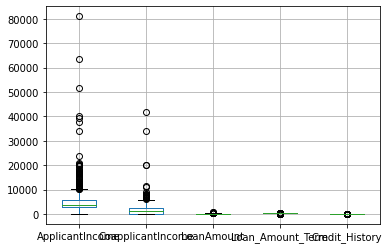

In [109]:
#box plot
df_model.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Credit_History'])

Perform treatment of these Outliers using appropriate techniqies.Explain your approach

In [0]:
#There are Different methods for the treatment of outliers 
# 1.)

Step 1 -
Perform Label Encoding on Target Variable (Loan_Status).

In [0]:
num_cols = df_model._get_numeric_data().columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'enc_Loan_status',
       'nc_Loan_status', 'enc_Education', 'enc_Property_Area'],
      dtype='object')

In [0]:
#Continous
for i in num_cols:
  print(str(i)+'\t'+str(len(df_model[i].unique())))

ApplicantIncome	505
CoapplicantIncome	287
LoanAmount	204
Loan_Amount_Term	11
Credit_History	3
enc_Loan_status	2
nc_Loan_status	2
enc_Education	2
enc_Property_Area	3


In [0]:
#Fit- Transform is followed for each method in scikit Learn where fit implies fitting the data into the method 
# and then transforming it based on method functionality

df_cat = df_model.copy()


In [0]:
#Fit- Transform is followed for each method in scikit Learn where fit implies fitting the data into the method 
# and then transforming it based on method functionality

le = LabelEncoder()
df_cat['enc_Loan_Status'] = le.fit_transform(df_cat['Loan_Status'])

In [118]:
df_cat.groupby(['Loan_Status','enc_Loan_Status']).size().reset_index().rename(columns={0:'count'})

,Loan_Status,enc_Loan_Status,count
0,N,0,192
1,Y,1,422


Step 2- Using dataframe from Step 1:




Perform Label Encoding on Categorical Independent Variables.

In [119]:
df_model.copy()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [0]:

for j in list(set(df_model.columns) - set(num_cols)):
  df_model['enc_'+str(j)] = le.fit_transform(df_model[j])

In [121]:
df_model.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'enc_Loan_Status', 'enc_Dependents', 'enc_Self_Employed', 'enc_Gender',
       'enc_Property_Area', 'enc_Married', 'enc_Education'],
      dtype='object')

In [122]:
df_model.head() #viewing the columns present in the dataser

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enc_Loan_Status,enc_Dependents,enc_Self_Employed,enc_Gender,enc_Property_Area,enc_Married,enc_Education
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,0,1,2,0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0,1,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,1,1,2,1,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,1,2,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,2,0,0


What is the shape of dataframe post Categorical Encoding ?

In [123]:
df_model.shape

(614, 19)

Carry out Correlation analysis on this dataframe. Plot using HeatMap

In [124]:
corr=df_model.corr()
corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,enc_Loan_Status,enc_Dependents,enc_Self_Employed,enc_Gender,enc_Property_Area,enc_Married,enc_Education
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.018615,-0.004710,0.115036,0.122728,0.046230,-0.009500,0.049052,-0.140760
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,0.011134,-0.059187,0.026683,-0.021807,0.086991,0.010522,0.077760,-0.062290
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.000607,-0.033214,0.158914,0.111754,0.097577,-0.046632,0.147108,-0.168759
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.000432,-0.020974,-0.084740,-0.028017,-0.075409,-0.077620,-0.095332,-0.077242
Credit_History,-0.018615,0.011134,-0.000607,0.000432,1.000000,0.540556,-0.065459,0.006209,0.005658,0.001963,0.009519,-0.073658


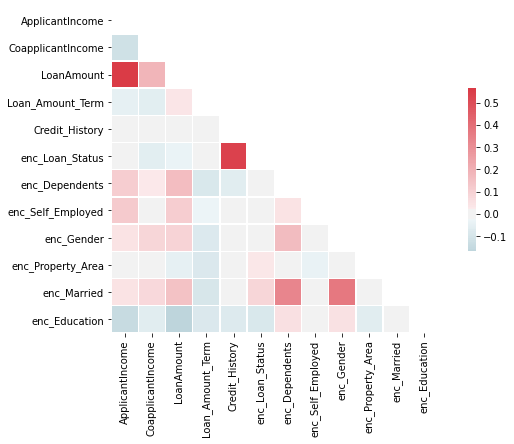

In [125]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 6))
# Generate a sadsfdgfg diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask.
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5).**

variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5) are:

1.) LoanAmount and ApplicantIncome
2.)enc_Loan_status and Credit_History

step3 :
**1.Perform One Hot Encoding on Categorical Independent Variables.**

In [127]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_model_ohe = df_model.copy()
df_model_ohe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enc_Loan_Status,enc_Dependents,enc_Self_Employed,enc_Gender,enc_Property_Area,enc_Married,enc_Education
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,0,1,2,0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0,1,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,1,1,2,1,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,1,2,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,2,0,0


2.What is the shape of dataframe post OHE Encoding ?

In [128]:
df_model_ohe.shape

(614, 19)

3**.Carry out Correlation analysis on this dataframe. Plot using HeatMap**

In [129]:
oheCorr= df_model_ohe.corr()
oheCorr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,enc_Loan_Status,enc_Dependents,enc_Self_Employed,enc_Gender,enc_Property_Area,enc_Married,enc_Education
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.018615,-0.004710,0.115036,0.122728,0.046230,-0.009500,0.049052,-0.140760
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,0.011134,-0.059187,0.026683,-0.021807,0.086991,0.010522,0.077760,-0.062290
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.000607,-0.033214,0.158914,0.111754,0.097577,-0.046632,0.147108,-0.168759
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.000432,-0.020974,-0.084740,-0.028017,-0.075409,-0.077620,-0.095332,-0.077242
Credit_History,-0.018615,0.011134,-0.000607,0.000432,1.000000,0.540556,-0.065459,0.006209,0.005658,0.001963,0.009519,-0.073658
enc_Loan_Status,-0.004710,-0.059187,-0.033214,-0.020974,0.540556,1.000000,-0.003361,0.009035,0.012213,0.032112,0.089072,-0.085884
enc_Dependents,0.115036,0.026683,0.158914,-0.084740,-0.065459,-0.003361,1.000000,0.044505,0.164475,0.005131,0.333841,0.054909
enc_Self_Employed,0.122728,-0.021807,0.111754,-0.028017,0.006209,0.009035,0.044505,1.000000,0.011676,-0.037106,-0.000257,-0.008734
enc_Gender,0.046230,0.086991,0.097577,-0.075409,0.005658,0.012213,0.164475,0.011676,1.000000,-0.019854,0.371532,0.049480
enc_Property_Area,-0.009500,0.010522,-0.046632,-0.077620,0.001963,0.032112,0.005131,-0.037106,-0.019854,1.000000,0.004415,-0.065243


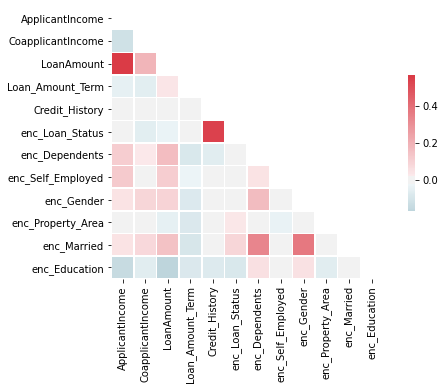

In [130]:
mask = np.zeros_like(oheCorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(9, 5))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

svm = sns.heatmap(oheCorr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**4.Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)**


 the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5) are:
---


1.LoanAmount and Applicationincome are strongly correlated.

2.enc_loan_Status and credit_History